In [1]:
import datetime as dt
import numpy as np
import pandas as pd

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
from functions import train_val_split

In [3]:
merged_train_all = train_val_split()[0]

merged_test_all = train_val_split()[1]

In [4]:
merged_train_all.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2013-01-01,1.0,2.0,0.0,0.0,0.0,0.0,a,1.0,c,a,1270.0,9.0,2008.0,0.0,NaN,NaN,NaN
1,2013-01-01,2.0,2.0,0.0,0.0,0.0,0.0,a,1.0,a,a,570.0,11.0,2007.0,1.0,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2013-01-01,3.0,2.0,0.0,0.0,0.0,0.0,a,1.0,a,a,14130.0,12.0,2006.0,1.0,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,2013-01-01,4.0,2.0,0.0,0.0,0.0,0.0,a,1.0,c,c,620.0,9.0,2009.0,0.0,NaN,NaN,NaN
4,2013-01-01,5.0,2.0,0.0,NaN,0.0,0.0,a,1.0,a,a,29910.0,4.0,2015.0,0.0,NaN,NaN,NaN


In [5]:
merged_train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506209 entries, 0 to 506208
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date                       506209 non-null  datetime64[ns]
 1   Store                      490906 non-null  float64       
 2   DayOfWeek                  491001 non-null  float64       
 3   Sales                      491019 non-null  float64       
 4   Customers                  491003 non-null  float64       
 5   Open                       491008 non-null  float64       
 6   Promo                      491091 non-null  float64       
 7   StateHoliday               490822 non-null  object        
 8   SchoolHoliday              490764 non-null  float64       
 9   StoreType                  490906 non-null  object        
 10  Assortment                 490906 non-null  object        
 11  CompetitionDistance        489599 non-null  float64 

In [6]:
merged_train_all.describe(include='all')

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,506209,490906.000000,491001.000000,491019.000000,491003.000000,491008.000000,491091.00000,490822,490764.000000,490906,490906,489599.000000,335054.000000,335054.000000,490906.000000,251409.000000,251409.000000,251409
unique,454,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,2014-02-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,1115,NaN,NaN,NaN,NaN,NaN,NaN,431699,NaN,265029,261071,NaN,NaN,NaN,NaN,NaN,NaN,147509
first,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2014-03-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,557.971860,4.005831,5629.458874,626.691043,0.832314,0.36344,NaN,0.167522,NaN,NaN,5404.413796,7.224832,2008.667048,0.512133,23.601136,2011.762888,NaN
std,NaN,321.852691,1.997336,3771.647014,459.918316,0.373587,0.48099,NaN,0.373442,NaN,NaN,7658.306253,3.209930,6.196482,0.499853,14.126675,1.673057,NaN
min,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,NaN,0.000000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,NaN,279.000000,2.000000,3628.000000,396.000000,1.000000,0.00000,NaN,0.000000,NaN,NaN,720.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN


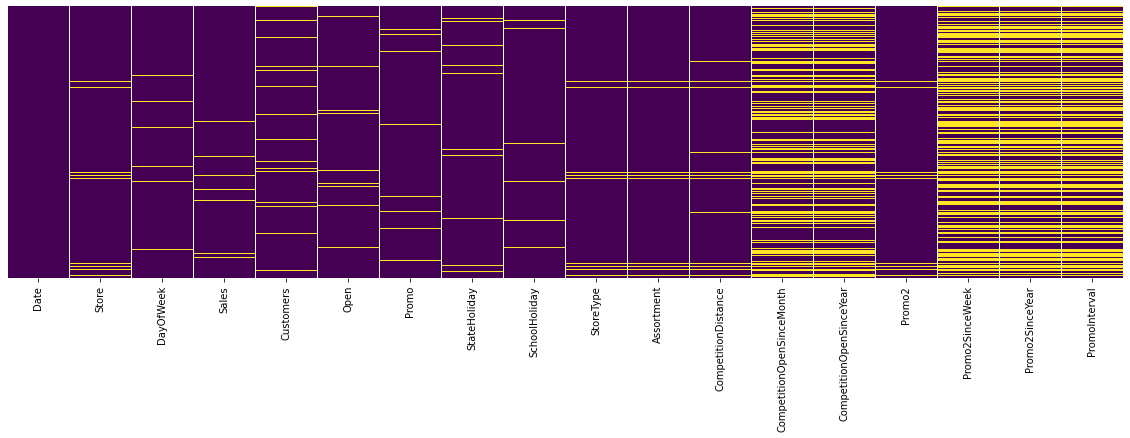

In [7]:
plt.figure(figsize=(20,5))
sns.heatmap(merged_train_all.sort_values(by='Date').isnull(),yticklabels=False,cbar=False,cmap='viridis')

For the sake of being able to create the models, rows with n/a values are dropped.Not whole columns, so that the total number of features is kept.

In [8]:
merged_train_clean = merged_train_all.dropna(axis=0)

In [9]:
merged_train_clean.describe(include='all')

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,129839,129839.000000,129839.000000,129839.000000,129839.000000,129839.000000,129839.000000,129839,129839.000000,129839,129839,129839.000000,129839.000000,129839.000000,129839.0,129839.000000,129839.000000,129839
unique,454,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,3
top,2013-02-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,310,NaN,NaN,NaN,NaN,NaN,NaN,113993,NaN,71054,76784,NaN,NaN,NaN,NaN,NaN,NaN,81077
first,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2014-03-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,559.961344,4.010074,5289.001910,552.404971,0.828449,0.362387,NaN,0.165328,NaN,NaN,4252.390499,7.189773,2008.168655,1.0,22.527107,2011.871356,NaN
std,NaN,326.269965,1.997871,3430.316185,364.243456,0.376991,0.480692,NaN,0.371478,NaN,NaN,5221.361558,3.249192,7.709763,0.0,13.607170,1.685176,NaN
min,NaN,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,40.000000,1.000000,1900.000000,1.0,1.000000,2009.000000,NaN
25%,NaN,276.000000,2.000000,3461.000000,363.000000,1.000000,0.000000,NaN,0.000000,NaN,NaN,600.000000,4.000000,2005.000000,1.0,13.000000,2011.000000,NaN


In [10]:
merged_train_clean.loc[:, 'Date'] = merged_train_clean.loc[:, 'Date'].map(dt.datetime.toordinal)

/Users/iskriyanavasileva/opt/anaconda3/envs/minicomp/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
merged_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129839 entries, 1 to 506179
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       129839 non-null  int64  
 1   Store                      129839 non-null  float64
 2   DayOfWeek                  129839 non-null  float64
 3   Sales                      129839 non-null  float64
 4   Customers                  129839 non-null  float64
 5   Open                       129839 non-null  float64
 6   Promo                      129839 non-null  float64
 7   StateHoliday               129839 non-null  object 
 8   SchoolHoliday              129839 non-null  float64
 9   StoreType                  129839 non-null  object 
 10  Assortment                 129839 non-null  object 
 11  CompetitionDistance        129839 non-null  float64
 12  CompetitionOpenSinceMonth  129839 non-null  float64
 13  CompetitionOpenSinceYear   12

For testing purposes dropping all columns that are not numerical

In [12]:
num_cols = merged_train_clean.columns[merged_train_clean.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

In [13]:
merged_train_clean = merged_train_clean[num_cols] 

In [14]:
merged_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129839 entries, 1 to 506179
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       129839 non-null  int64  
 1   Store                      129839 non-null  float64
 2   DayOfWeek                  129839 non-null  float64
 3   Sales                      129839 non-null  float64
 4   Customers                  129839 non-null  float64
 5   Open                       129839 non-null  float64
 6   Promo                      129839 non-null  float64
 7   SchoolHoliday              129839 non-null  float64
 8   CompetitionDistance        129839 non-null  float64
 9   CompetitionOpenSinceMonth  129839 non-null  float64
 10  CompetitionOpenSinceYear   129839 non-null  float64
 11  Promo2                     129839 non-null  float64
 12  Promo2SinceWeek            129839 non-null  float64
 13  Promo2SinceYear            12

# Scaler Function

# Baseline Model

# Random Forest

In [15]:
#predictor_variables = [c for c in merged_df.columns]

In [16]:
merged_train_unique = merged_train_clean.loc[:, 'Store'].unique()

In [17]:
merged_train_dic = {}
for store in merged_train_unique:
    merged_train_dic[store] = pd.DataFrame(data=merged_train_clean[merged_train_clean.loc[:, 'Store']==store])

In [18]:
forecast_all = pd.DataFrame() 

for store, df in merged_train_dic.items():
    x_train = merged_train_dic[store].drop(columns=['Sales'], axis=1)
    y_train = merged_train_dic[store].loc[:, 'Sales']
    
    forecast_tmp = y_train
            
    scaler = StandardScaler()
    scaled_x_train = x_train.values.reshape(-1,1)
    
    
    rf = RandomForestRegressor(random_state = 42)
    rf.fit(scaled_x_train,y_train)
    
    forecast_tmp['sales_predicted'] = rf.predict(scaled_x_train)#scaled_x_train
    forecast_tmp['store'] = store
    forecast_all = pd.concat((forecast_all, forecast_tmp))

    # calculate model R2 per store
    print('- STORE', store, '- \n Random Forest Regressor controlled for %4.1f %% of the variance in the performance measure.' % (100*rf.score(scaled_x_train,y_train)))

ValueError: Found input variables with inconsistent numbers of samples: [4511, 347]